In [6]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#use nltk.download() and download only books. Using full download will takeup time and bandwidth
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')
!pip install newspaper3k

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 215kB 4.2MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 7.4MB 36.9MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3358 sha256=3b510e04a11cde8874537c027fa801547d98335f96b2fb7c36032ec0477ac167
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=951dd40866b62184825f5ecd121d912f2936d966b9138869acda07c7c921bd1c
  Stored in directory: /root/

In [10]:
#get a demo article and load it to memory
from newspaper import Article
url = 'https://www.vox.com/recode/22221173/elon-musk-tesla-foundation-philanthropy-wealthiest-person'
article = Article(url)
article.download()
# data = open('Demo_Article.json','r')
article.html
article.parse()
article.authors

['Theodore Schleifer',
 'Li Zhou',
 'Ella Nilsen',
 'Ian Millhiser',
 'Rebecca Heilweil',
 'Andrew Prokop',
 'Anna North',
 'Melinda Fakuade',
 'Jan']

In [11]:
len(article.text)

7795

In [13]:
# Convert the free text into tokens
tokens = word_tokenize(article.text)
print(tokens)


['The', 'richest', 'person', 'in', 'the', 'world', 'would', 'like', 'your', 'help', 'giving', 'away', 'his', 'billions', 'of', 'dollars', '.', 'One', 'of', 'the', 'first', 'things', 'that', 'Elon', 'Musk', ',', 'the', 'founder', 'and', 'CEO', 'of', 'Tesla', ',', 'did', 'upon', 'climbing', 'to', 'the', 'top', 'of', 'American', 'capitalism', 'last', 'week', 'was', 'to', 'ask', 'for', 'any', 'advice', 'about', 'how', 'to', 'climb', 'the', 'ranks', 'of', 'philanthropy', '.', 'Now', 'that', 'he', 'has', 'more', 'money', 'than', 'anyone', 'else', 'on', 'the', 'planet', ',', 'Musk', 'is', 'likely', 'to', 'come', 'under', 'far', 'greater', 'scrutiny', 'than', 'he', 'ever', 'has', 'about', 'how', 'he', 'gives', 'it', 'away', '—', 'or', 'doesn', '’', 't', '.', 'Amazon', 'founder', 'Jeff', 'Bezos', ',', 'whom', 'Musk', 'displaced', 'from', 'the', 'top', 'ranking', ',', 'drew', 'more', 'and', 'more', 'negative', 'attention', 'for', 'his', 'penny-pinching', 'philanthropy', 'as', 'he', 'became', 'we

In [14]:
#identify unique words and single char words
print(len(tokens))
unique = set(tokens)
print('# of Unique tokens',len(unique))
print('# of tokens / len of unique tokens',len(tokens)/len(unique))

1545
# of Unique tokens 572
# of tokens / len of unique tokens 2.7010489510489513


In [15]:
#lets sort here
sorted(unique)
single=[w for w in unique if len(w) == 1 ]
print(len(single))
single

22


['”',
 '’',
 ';',
 's',
 '“',
 '@',
 '6',
 '(',
 '8',
 ':',
 '—',
 ')',
 'A',
 'a',
 '$',
 '.',
 ',',
 'I',
 'w',
 '5',
 '&',
 't']

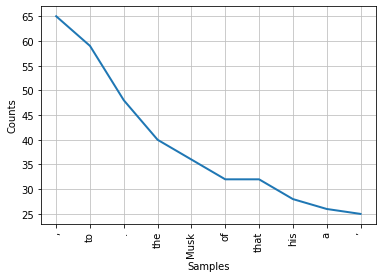

In [16]:
# Frequency distribution of the words
%matplotlib inline
tokens.count('gluten')
fd = nltk.FreqDist(tokens)
fd.most_common(10)
fd.plot(10)

In [17]:
# How long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
fd_wlen

FreqDist({1: 22,
          2: 33,
          3: 57,
          4: 98,
          5: 78,
          6: 69,
          7: 60,
          8: 51,
          9: 39,
          10: 24,
          11: 17,
          12: 13,
          13: 4,
          14: 3,
          15: 4})

In [24]:
#text preprocessing: remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation + "".join(['’' , '“', '”' , '—']) ]
tokens_nop

# Convert all characters to Lower case
tokens_lower=[ t.lower() for t in tokens_nop ]

# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')

# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]

#remove number like characters 
tokens_nostop = [x for x in tokens_nostop if not any(c.isdigit() for c in x)]
FreqDist(tokens_nostop).most_common(10)

[('musk', 36),
 ('foundation', 17),
 ('million', 13),
 ('money', 12),
 ('said', 9),
 ('away', 7),
 ('one', 6),
 ('tesla', 6),
 ('philanthropy', 6),
 ('also', 6)]

In [25]:
# The snowball stemmer -  which supports 13 non-English languages as well!
snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
print(tokens_snow[:10])

['richest', 'person', 'world', 'would', 'like', 'help', 'give', 'away', 'billion', 'dollar']


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc =  nlp("Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%.")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Elon PROPN compound
Musk PROPN nsubj
first ADV advmod
passed VERB ROOT
Bezos PROPN dobj
to PART aux
claim VERB advcl
the DET det
title NOUN dobj
of ADP prep
world NOUN pobj
’s PART punct
richest ADJ amod
person NOUN appos
last ADJ amod
Friday PROPN npadvmod
, PUNCT punct
but CCONJ cc
then ADV advmod
dropped VERB conj
to ADP prep
the DET det
No NOUN dep
. NOUN nmod
two NUM nummod
spot NOUN pobj
on ADP prep
Monday PROPN pobj
as SCONJ mark
Tesla PROPN compound
shares NOUN nsubj
fell VERB advcl
nearly ADV advmod
8 NUM nummod
% NOUN npadvmod
. PUNCT punct


In [5]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Elon Musk 0 9 PERSON
Bezos 23 28 PERSON
last Friday 74 85 DATE
two 115 118 CARDINAL
Monday 127 133 DATE
Tesla 137 142 ORG
nearly 8% 155 164 PERCENT


In [ ]:
sent = '''Professor Tan Eng Chye, NUS Deputy President and Provost, and Professor 
Menahem Ben-Sasson, President of HUJ signed the joint degree agreement at NUS, 
in the presence of Ambassador of Israel to Singapore Her Excellency Amira Arnon 
and about 30 invited guests, on July 03, 2013.
'''

In [ ]:
doc = nlp(sent)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Tan Eng Chye 10 22 PERSON
NUS 24 27 ORG
Provost 49 56 ORG
Menahem Ben-Sasson 73 91 PERSON
HUJ 106 109 ORG
NUS 147 150 ORG
Israel 186 192 GPE
Singapore 196 205 GPE
Amira Arnon 221 232 PERSON
about 30 238 246 CARDINAL
July 03, 2013 266 279 DATE


POST Tag followed by NE Chunk

In [ ]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)

Professor Tan Eng Chye Chye nsubj signed
NUS Deputy President President appos Chye
Provost Provost conj President
Professor Professor conj Chye
Menahem Ben-Sasson Sasson conj Professor
President President appos Sasson
HUJ HUJ pobj of
the joint degree agreement agreement dobj signed
NUS NUS pobj at
the presence presence pobj in
Ambassador Ambassador pobj of
Israel Israel pobj of
Her Excellency Excellency dobj Singapore
Amira Arnon Arnon appos Excellency
about 30 invited guests guests dobj Singapore
July July pobj on


In [ ]:
# object and subject constants
OBJECT_DEPS = {"dobj", "dative", "attr", "oprd"}
SUBJECT_DEPS = {"nsubj", "nsubjpass", "csubj", "agent", "expl"}
# tags that define wether the word is wh-
WH_WORDS = {"WP", "WP$", "WRB"}

# extract the subject, object and verb from the input
def extract_svo(doc):
    sub = []
    at = []
    ve = []
    for token in doc:
        # is this a verb?
        if token.pos_ == "VERB":
            ve.append(token.text)
        # is this the object?
        if token.dep_ in OBJECT_DEPS or token.head.dep_ in OBJECT_DEPS:
            at.append(token.text)
        # is this the subject?
        if token.dep_ in SUBJECT_DEPS or token.head.dep_ in SUBJECT_DEPS:
            sub.append(token.text)
    return " ".join(sub).strip().lower(), " ".join(ve).strip().lower(), " ".join(at).strip().lower()

def is_question(doc):
    # is the first token a verb?
    if len(doc) > 0 and doc[0].pos_ == "VERB":
        return True, ""
    # go over all words
    for token in doc:
        # is it a wh- word?
        if token.tag_ in WH_WORDS:
            return True, token.text.lower()
    return False, ""

In [ ]:
subject, verb, attribute = extract_svo(doc)

In [ ]:
subject

'professor tan eng chye , president , and professor'

In [ ]:
verb

'signed invited'

In [ ]:
attribute

'the degree agreement her excellency arnon 30 invited guests'